<a href="https://colab.research.google.com/github/seymatttass/MachineLearningExamples/blob/main/ML2_LassoReg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

In [ ]:
hit = pd.read_csv("/content/drive/MyDrive/Ornek_calısmalar/Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[["League","Division","NewLeague"]])
y = df["Salary"]
X_ = df.drop(["Salary","League","Division","NewLeague"],axis=1).astype("float64")
X = pd.concat([X_,dms[["League_N","Division_W","NewLeague_N"]]],axis =1)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [ ]:
from sklearn.linear_model import Lasso

lasso_model = Lasso(alpha=0.1).fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.249e+06, tolerance: 3.899e+03
  model = cd_fast.enet_coordinate_descent(


In [ ]:
lasso_model

Lasso(alpha=0.1)

In [ ]:
lasso_model.coef_

array([-1.72206506e+00,  8.56210197e+00,  6.91175137e+00, -3.13240128e+00,
       -2.00771676e+00,  5.36159035e+00,  8.86871593e+00, -1.69520371e-01,
       -5.58121413e-02, -3.53962588e-01,  1.70961000e+00,  6.40603469e-01,
       -6.58519895e-01,  2.60093222e-01,  2.78717030e-01, -5.92690965e-01,
        1.12659630e+02, -9.99652090e+01, -4.81289395e+01])

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.470e+03, tolerance: 3.899e+03
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.540e+03, tolerance: 3.899e+03
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.002e+03, tolerance: 3.899e

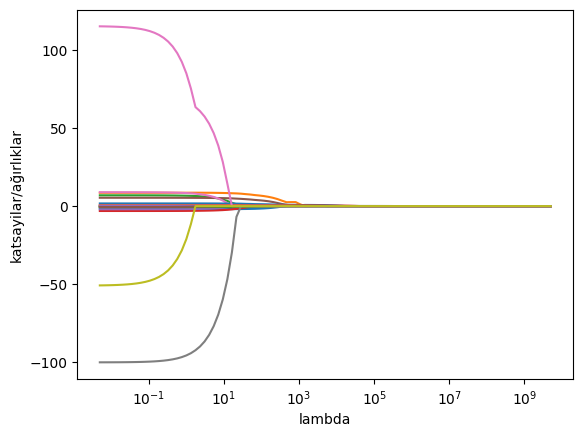

In [ ]:
lasso = Lasso()
labmdalar = 10**np.linspace(10,-2,100)*0.5
katsayilar = []
for lab in labmdalar:
  lasso.set_params(alpha = lab)
  lasso.fit(X_train, y_train)
  katsayilar.append(lasso.coef_)

ax = plt.gca()
ax.plot(labmdalar, katsayilar)
ax.set_xscale("log")
plt.axis("tight")
plt.xlabel("lambda")
plt.ylabel("katsayilar/ağırlıklar")
plt.show()

In [ ]:
# TAHMİN

lasso_model.predict(X_test)

array([ 613.88833029,  701.97056731, 1005.55539526,  414.08312603,
        399.18417127,  344.71444139,  664.86990217,  451.60757   ,
        914.64492066,  644.67006406,  691.60613554,  884.71702368,
        210.04523766,  446.12527252,  262.94922087,  499.22332142,
        805.2275034 ,   43.49230343, 1250.49322312,  316.34470193,
        422.96656686,  743.29944548,  572.90774248,  655.15609074,
        618.96407069,  200.75845796,  882.64622066,  254.06366112,
        430.25494812,   84.17391461,  143.60312305,  130.61554   ,
        363.74498233,  461.7321162 ,  273.42345417,  244.49816262,
       1324.62748553,  107.89909718,  135.63065031,  242.72630885,
         51.70024086,  297.57598929,  586.86143037,  398.85227639,
        763.99543074,  690.10003532,  344.06272851,  247.43966241,
        255.13234043,  662.89091837,  765.66189   ,  313.57347726,
        765.84996179,  189.77235179,  283.98765436,  589.95238974,
        663.31166365,  803.29524626,  164.99767232, 1170.24294

In [ ]:
y_pred = lasso_model.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))


356.7545270148771

In [ ]:
# MODEL TUNİNG

from sklearn.linear_model import LassoCV



In [ ]:
lasso_cv_model = LassoCV(alphas= None,
                         cv = 10,
                         max_iter=10000)

In [ ]:
lasso_cv_model.fit(X_train,y_train)

LassoCV(cv=10, max_iter=10000)

In [ ]:
lasso_cv_model.alpha_

563.4670501833853

In [ ]:
lasso_tuned = Lasso(alpha=lasso_cv_model.alpha_)
lasso_tuned.fit(X_train,y_train)
y_pred = lasso_tuned.predict(X_test)

In [ ]:
np.sqrt(mean_squared_error(y_test,y_pred))

373.59572250697937